# housing data

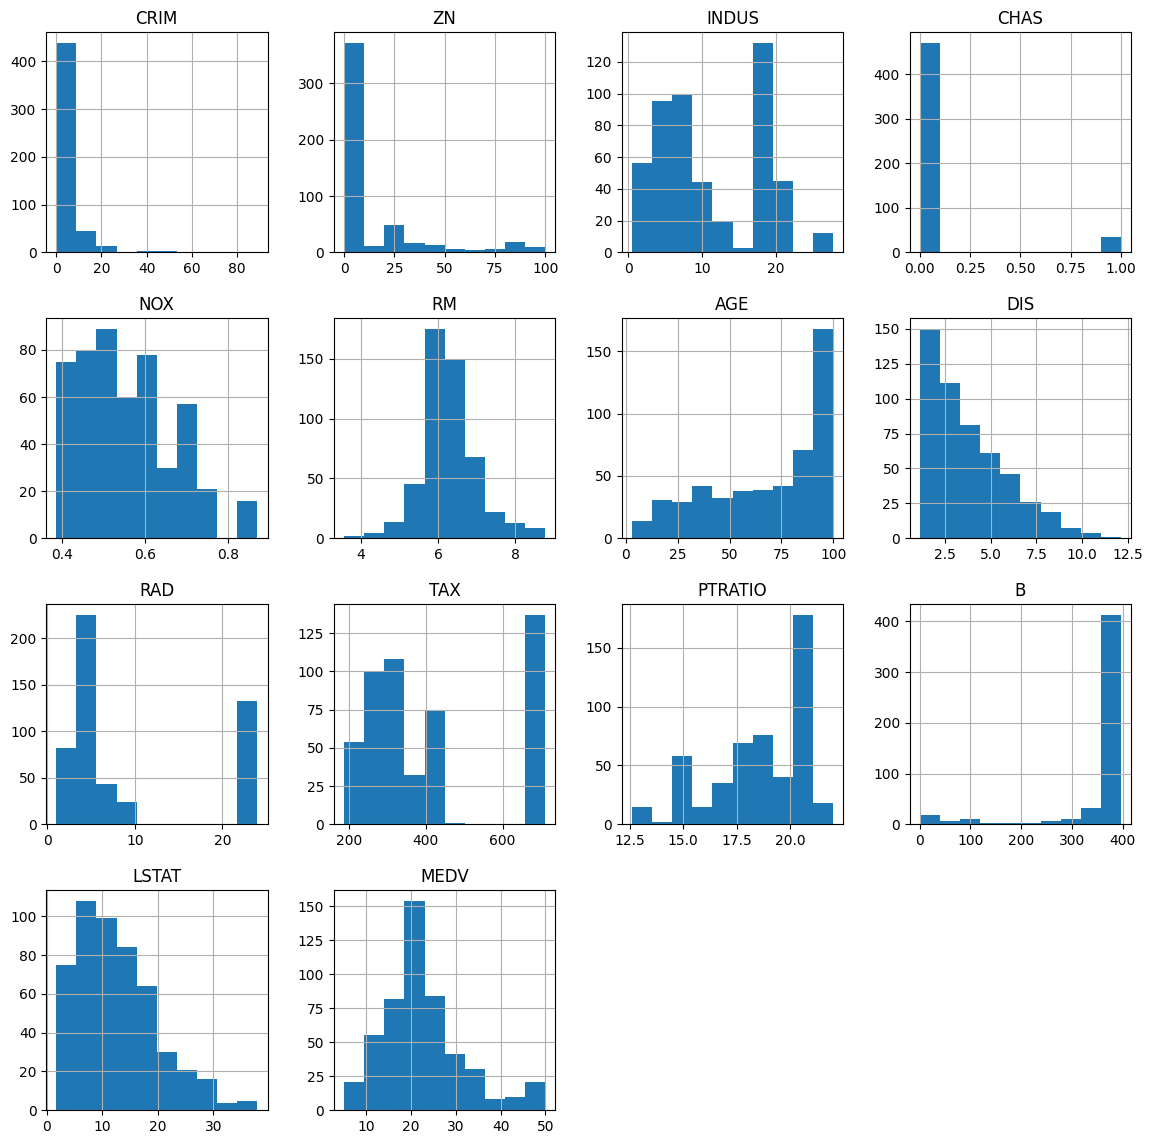

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\bhend\pythonfile\machine_learning project\data.csv",encoding='unicode_escape')

df.hist(figsize=(14,14))
plt.show()

# Train and splitting

In [2]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices] ,data.iloc[test_indices]  

In [3]:
train_set,test_set=split_train_test(df,0.2)
print(f"rows in train set:{len(train_set)} \n rows in test set:{len(test_set)}")

rows in train set:405 
 rows in test set:101


In [4]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]


In [6]:
print(strat_test_set['CHAS'].value_counts())

CHAS
0    95
1     7
Name: count, dtype: int64


#  Correlation between the data

In [7]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=True)




LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.696169
MEDV       1.000000
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>]], dtype=object)

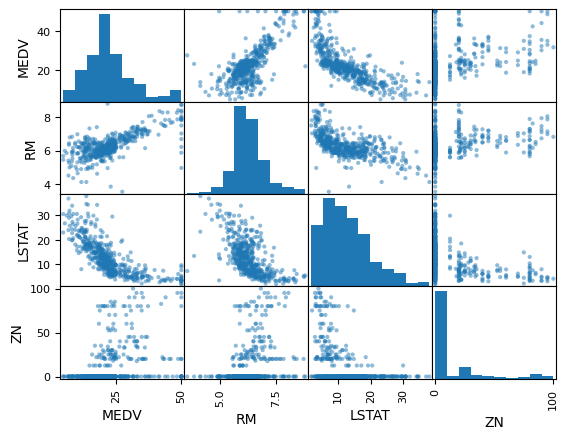

In [8]:
from pandas.plotting import scatter_matrix
comparing_values=['MEDV','RM','LSTAT','ZN']
scatter_matrix(df[comparing_values])

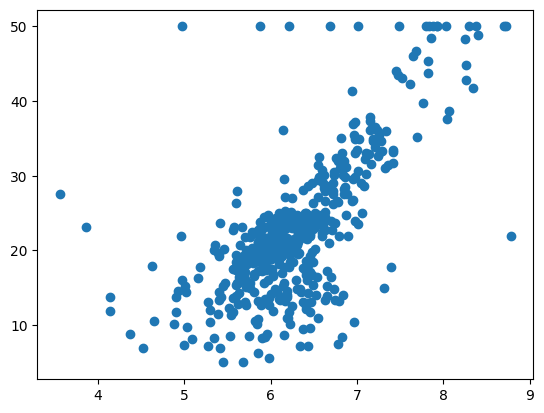

In [9]:
plt.scatter(x=df['RM'],y=df['MEDV'],alpha=1.0)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [34]:
housing_num_tr=my_pipeline.fit_transform(df)
housing_num_tr.shape


(506, 14)

#  Selected  a desired model for Dragon Real estate

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
df_label=strat_train_set['MEDV'].copy()
model.fit(housing_num_tr,df)


LinearRegression()